In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import csv

In [2]:
#load data function
def load_data(file):
    csvfile = open(file)
    csvfile = csv.reader(csvfile)
    fields = next(csvfile)
    data = np.array([row for row in csvfile],dtype=float).T
    return data,fields

In [3]:
def normalize_data(X):
    m = np.mean(X,axis=1,keepdims=True)
    v = np.mean((X-m)**2,axis=1,keepdims=True)
    return m,v ,(X-m)/v

In [4]:
#loading data
X_train_orig,fields = load_data("Diabetes_Xtrain.csv")
X_train = X_train_orig[:,:460]
X_dev = X_train_orig[:,460:]
Y_train_orig,notreq = load_data("Diabetes_Ytrain.csv")
Y_train = Y_train_orig[:,:460]
Y_dev = Y_train_orig[:,460:]
X_test,fields = load_data("Diabetes_Xtest.csv")
m,var,X_train = normalize_data(X_train)
plt.show()

In [5]:
def initialize_parameters(layer_dims):
    parameters ={}
    V = {}
    L = len(layer_dims)
    for l in range(L-1):
        parameters['W' +str(l+1)] = np.random.randn(layer_dims[l+1],layer_dims[l])*((2/layer_dims[l])**0.5)
        parameters['b'+str(l+1)] = np.zeros((layer_dims[l+1],1))
        V['dW' + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        V['db'+str(l+1)] = np.zeros(parameters['b' +str(l+1)].shape)
    return parameters,V


In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(100)

1.0

In [7]:
def relu(z):
    return np.where(z>0,z,0.01*z)

In [8]:
def forward_propagation(X,parameters):
    cache = {}
    cache['a0'] = X
    L = len(parameters)//2+1
    for l in range(L-2):
        cache['a'+str(l+1)] = relu( np.dot(parameters['W'+str(l+1)],cache['a'+str(l)]) + parameters['b'+str(l+1)] )
    cache['a'+str(L-1)] = sigmoid(np.dot(parameters['W'+str(L-1)],cache['a'+str(L-2)])+parameters['b'+str(L-1)])
    #assert(np.sum(np.array(cache['a'+str(L-1)]!=1,dtype=int))==1)
    return cache

In [9]:
def compute_cost(z,Y):
    m = Y.shape[1]
    return np.squeeze(-np.mean(Y*np.log(z)+(1-Y)*np.log(1-z)))

In [10]:
def back_propagation(X,Y,parameters,V,cache,learning_rate,t,beta=0.9,beta2 =0.999):
    m = X.shape[1]
    L = len(cache)
    grads = {}
    grads['dz'+str(L-1)] = cache['a'+str(L-1)]-Y
    for l in range(L-1,0,-1):
        grads['dW'+str(l)] = np.dot(grads['dz'+str(l)],cache['a'+str(l-1)].T)/m
        grads['db'+str(l)] = np.mean(grads['dz'+str(l)],keepdims=True)
        if(l>1):
            grads['da'+str(l-1)]= np.dot(parameters['W'+str(l)].T,grads['dz'+str(l)])
            grads['dz'+str(l-1)] = np.where(cache['a'+str(l-1)]>0,1,0.01)*grads['da'+str(l-1)]
        V['dW'+str(l)] = beta*V['dW'+str(l)] + (1-beta)*grads['dW'+str(l)] 
        V['db'+str(l)] = beta*V['db'+str(l)] + (1-beta)*grads['db'+str(l)]
    for l in range(L-1):
        parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - learning_rate*V['dW'+str(l+1)]/(1-beta2**t)
        parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - learning_rate*V['db'+str(l+1)]/(1-beta2**t)
    return parameters,V

In [11]:
def model(X,Y,learning_rate=0.01,num_iterations=3000):
    np.random.seed(0)
    parameters,V = initialize_parameters((X.shape[0],7,2,2,Y.shape[0]))
    costs = []
    for i in range(num_iterations):
        cache = forward_propagation(X,parameters)
        cost  = compute_cost(cache['a4'],Y)
        parameters,V =  back_propagation(X,Y,parameters,V,cache,learning_rate,i+1)
        if i%100==0:
            costs.append(cost)
            #if(i>0):
             #   print(cache['a3']==a3)
            #a3 = cache['a3']
            print("the cost of {}th iteration is {}".format(str(i),str(cost)))
    plt.plot(costs)
    plt.title("Learning rate = {}".format(learning_rate))
    plt.ylabel("cost per 100 iterations")
    plt.xlabel("iterations per 100")
    plt.show()
    return parameters

the cost of 0th iteration is 0.6932913052533852
the cost of 100th iteration is 0.6372901887047777
the cost of 200th iteration is 0.5940241037907957
the cost of 300th iteration is 0.5794790865024361
the cost of 400th iteration is 0.5633555189433203
the cost of 500th iteration is 0.5449744112045607
the cost of 600th iteration is 0.5110665174458086
the cost of 700th iteration is 0.4835562943725145
the cost of 800th iteration is 0.46075577570268805
the cost of 900th iteration is 0.4471278843259947
the cost of 1000th iteration is 0.4388953407243833
the cost of 1100th iteration is 0.4337222571692241
the cost of 1200th iteration is 0.4302448450408767
the cost of 1300th iteration is 0.4281628136748569
the cost of 1400th iteration is 0.4267210425812779
the cost of 1500th iteration is 0.42657285068354905
the cost of 1600th iteration is 0.42737269508303455
the cost of 1700th iteration is 0.42440067825753075
the cost of 1800th iteration is 0.4312622714373472
the cost of 1900th iteration is 0.42338

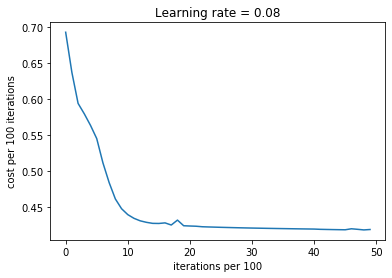

In [12]:
parameters = model(X_train,Y_train,0.08,5000  )  #1.5,6000   0.407,12000,1 70...   0.05/0.5,30000 6 0.7260869565217392/73  0.06,13500 0,80 78

In [13]:
#prediction
def predict(parameters,X,Y=None,print_accuracy=0,normalize=1):
    if(normalize):
        X = (X-m)/var
    cache = forward_propagation(X,parameters)
    Y_p = np.array(cache['a4']>=0.5 ,dtype=int)
    if(print_accuracy):
        Accuracy = np.mean(np.array(Y_p==Y,dtype=int))
        print('Accuracy of the given is set = ',Accuracy)
    return Y_p

In [14]:
print("training set:")
y1 = predict(parameters,X_train,Y_train,1,0)
print("dev set:")
y2 =predict(parameters,X_dev,Y_dev,1)

training set:
Accuracy of the given is set =  0.8021739130434783
dev set:
Accuracy of the given is set =  0.8103448275862069


In [15]:
#prediction on the test set
Y_p= predict(parameters,X_test)
index =0
for i in range(8):
    print(fields[i],":",X_test[i][index])
print("Prediction --> is Diabetic:", bool(Y_p[0][index]))

Pregnancies : 0.0
Glucose : 180.0
BloodPressure : 90.0
SkinThickness : 26.0
Insulin : 90.0
BMI : 36.5
DiabetesPedigreeFunction : 0.314
Age : 35.0
Prediction --> is Diabetic: True
